In [1]:
import math
import sympy
from sympy.abc import x,y
from sympy import *
init_printing( use_latex='mathjax' )
f = Function("f")

Дана функция

\begin{equation}
f(x) = \frac{1}{x}, x \in [1,2]
\end{equation}

При среднеквадратической линейной аппроксимации для функции нам необходимо вычислить следующую величину:

\begin{equation}
\left( \sqrt{\int\limits_1^2 \left( \frac{1}{x} - ax - b \right)^2dx} \right)' = 0
\end{equation}

In [2]:
a = symbols("a")
b = symbols("b")

In [17]:
f = (1/x - a*x - b)**2

In [18]:
r=f.subs({x:1, a:1, b:1})
print("Проверка", r)

Проверка 1


In [19]:
(integrate(f, (x, 1, 2)))**(1/2)

                                          0.5
⎛   2                                    ⎞   
⎜7⋅a                   2                1⎟   
⎜──── + 3⋅a⋅b - 2⋅a + b  - 2⋅b⋅log(2) + ─⎟   
⎝ 3                                     2⎠   

In [20]:
g = (integrate(f, (x, 1, 2)))**(1/2)

In [21]:
h=g.subs({a:0, b:-1})
print("Проверка", h)

Проверка (2*log(2) + 3/2)**0.5


In [27]:
diff(g, a)

                                                                             -
                                   ⎛   2                                    ⎞ 
                                   ⎜7⋅a                   2                1⎟ 
(2.33333333333333⋅a + 1.5⋅b - 1.0)⋅⎜──── + 3⋅a⋅b - 2⋅a + b  - 2⋅b⋅log(2) + ─⎟ 
                                   ⎝ 3                                     2⎠ 

0.5
   
   
   
   

In [24]:
l = diff(g, a)

In [28]:
diff(g, b)

                                                                   -0.5
                         ⎛   2                                    ⎞    
                         ⎜7⋅a                   2                1⎟    
(1.5⋅a + 1.0⋅b - log(2))⋅⎜──── + 3⋅a⋅b - 2⋅a + b  - 2⋅b⋅log(2) + ─⎟    
                         ⎝ 3                                     2⎠    

In [25]:
j = diff(g, b)

In [62]:
linsolve([7*a + 4.5*b - 3, 1.5*a + b - log(2)], (a, b))

{(12.0 - 18.0⋅log(2), -18.0 + 28.0⋅log(2))}

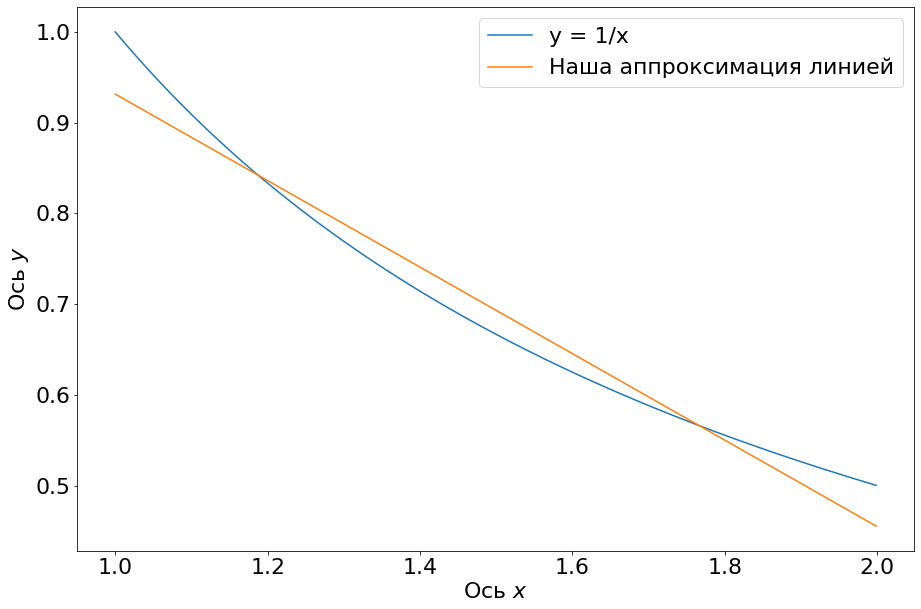

In [63]:
import matplotlib.pyplot as plt
import decimal
import numpy as np
%matplotlib inline
plt.rc('font', **{'size' : 22})

xlist = np.around(np.arange(1, 2, 0.001), decimals=4)
ylist_theoretical = 1 / xlist
ylist_my = (12-18*log(2))*xlist + (-18 + 28*log(2))
plt.figure(figsize=(15, 10))

plt.plot(xlist, ylist_theoretical, label = u'y = 1/x')
plt.plot(xlist, ylist_my, label = u'Наша аппроксимация линией')

plt.xlabel('Ось $x$')
plt.ylabel('Ось $y$')
plt.legend()

plt.show()